In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od
dataset_url = "https://www.kaggle.com/datasets/mrmorj/hate-speech-and-offensive-language-dataset/data"
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: mikemwita
Your Kaggle Key: ··········


100%|██████████| 1.01M/1.01M [00:00<00:00, 30.4MB/s]

In [ ]:
import pandas as pd

df = pd.read_csv('hate-speech-and-offensive-language-dataset/labeled_data.csv')
df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [ ]:
import os
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import nltk
import re
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.stem import WordNetLemmatizer
import itertools
from wordcloud import WordCloud
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from keras.models import Sequential,Model
from keras.layers import Dense,LSTM, SpatialDropout1D, Embedding
from joblib import dump, load

In [ ]:
text = []
clas = []
text = df['tweet'].tolist()
clas = df['class'].tolist()

In [ ]:
# dataframe for text preprocessing
df = pd.DataFrame({'tweet': text, 'class': clas})

In [ ]:
# convert data to lowecase
df['tweet'] = df['tweet'].apply(lambda x:x.lower())

In [ ]:
# bow for final data preparation
cv = CountVectorizer(max_features = 75)
X = cv.fit_transform(df['tweet']).toarray()
y = df['class']

In [ ]:
# splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify=y, random_state = 42)

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                              cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

accuracy is:  0.7963685272360457


['decision.joblib']

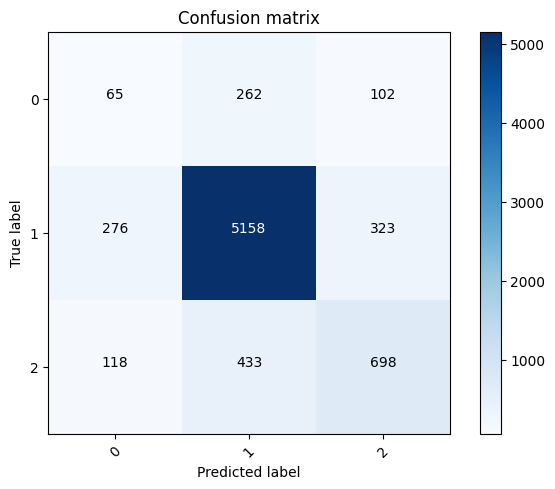

In [ ]:
# decision tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("accuracy is: ",accuracy)
CM = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(CM, classes = range(3))
dump(clf, 'decision.joblib')

In [ ]:
from keras.utils import to_categorical


In [ ]:
# Convert labels to categorical format
# y_train = to_categorical(y_train, num_classes=3, dtype='float32')
# y_test = to_categorical(y_test, num_classes=3, dtype='float32')


In [ ]:
from keras.utils import to_categorical

# Convert labels to categorical format
y_train_encoded = to_categorical(y_train, num_classes=3)
y_test_encoded = to_categorical(y_test, num_classes=3)

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import pickle

In [ ]:
# Tokenize and pad the input text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['tweet'])
sequences = tokenizer.texts_to_sequences(df['tweet'])

max_sequence_length = 100

X_train_padded = pad_sequences(sequences, maxlen=max_sequence_length)

tokenizer_path = 'tokenizer.pkl'
with open(tokenizer_path, 'wb') as tokenizer_file:
    pickle.dump(tokenizer, tokenizer_file)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_train_padded, y, test_size=0.3, stratify=y, random_state=42)

In [ ]:
# training the model

In [ ]:
model = Sequential()
model.add(Embedding(232337, 100, input_length=max_sequence_length))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(20, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
epochs = 25
batch_size = 64

# Fiting the model using the encoded labels
history = model.fit(X_train, y_train_encoded, validation_data=(X_test, y_test_encoded), epochs=epochs, batch_size=batch_size)

# history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=batch_size)

Epoch 1/25
272/272 [==============================] - 192s 692ms/step - loss: 0.5086 - accuracy: 0.8268 - val_loss: 0.3329 - val_accuracy: 0.8881
Epoch 2/25
260/272 [===========================>..] - ETA: 8s - loss: 0.2552 - accuracy: 0.9137

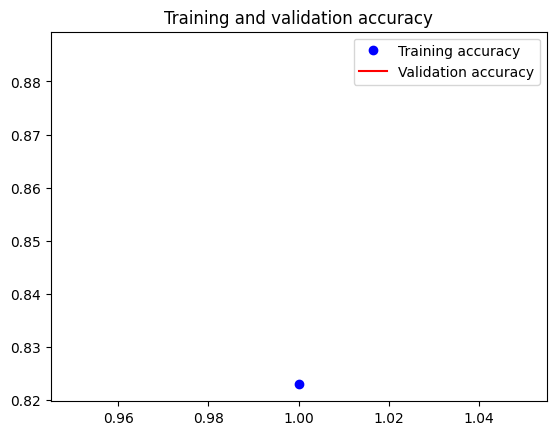

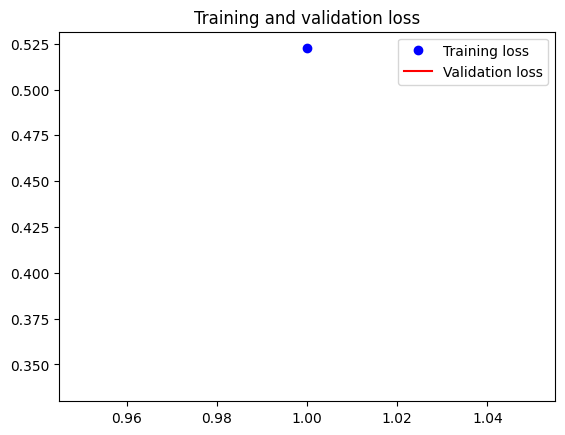

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
model.save('lstm.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import pickle
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer

def preprocess_text(text):
    processed_text = text.lower()
    processed_text = re.sub(r'[^a-zA-Z0-9\s]', '', processed_text)
    return processed_text

text = df['tweet'].tolist()
clas = df['class'].tolist()

df = pd.DataFrame({'tweet': text, 'class': clas})

df['tweet'] = df['tweet'].apply(lambda x: preprocess_text(x))

tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['tweet'])
sequences = tokenizer.texts_to_sequences(df['tweet'])

max_sequence_length = 100

X_train = pad_sequences(sequences, maxlen=max_sequence_length)

tokenizer_path = 'tokenizer.pkl'
with open(tokenizer_path, 'wb') as tokenizer_file:
    pickle.dump(tokenizer, tokenizer_file)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)



Alarm Functionality

In [ ]:
!pip install librosa


# EMOTION DETECTION COMPONENT

In [ ]:
!unzip chid.zip


Archive:  chid.zip
 extracting: README.dataset.txt      
 extracting: README.roboflow.txt     
   creating: test/
 extracting: test/101_png_jpg.rf.7956bc99403100eb13874d5eed5d9251.jpg  
 extracting: test/102_png_jpg.rf.3c4e0adbda096b7e6f947c891658f51a.jpg  
 extracting: test/104_png_jpg.rf.6d626b74743dc5980b9262f88239ecd4.jpg  
 extracting: test/106_png_jpg.rf.2be7d1870e53d8a8dcd84770859cccd8.jpg  
 extracting: test/107_png_jpg.rf.67d2eaa3c75def5a2f12053de4b9800b.jpg  
 extracting: test/108_png_jpg.rf.2af173cc6aab42601c90a550b04cdc42.jpg  
 extracting: test/108_png_jpg.rf.9226d9f3fd15941786530f61738e9e7a.jpg  
 extracting: test/108_png_jpg.rf.cb8ff0a465e444d9725ded5d11e2db8e.jpg  
 extracting: test/10_png_jpg.rf.82e204b7605d074b694a18dd88316b86.jpg  
 extracting: test/111_png_jpg.rf.5825de0f00686849a799afb188b5040a.jpg  
 extracting: test/111_png_jpg.rf.e14669e3514c18f12c3fe432e375431b.jpg  
 extracting: test/112_png_jpg.rf.090734cc155a55887ce63f596a824088.jpg  
 extracting: test/112_p

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from PIL import UnidentifiedImageError

Data preprocessing

In [ ]:
%ls /content


chid.zip  README.dataset.txt  README.roboflow.txt  sample_data/  test/  train/  valid/


In [ ]:
data_dir = '/content'
train_dir = os.path.join(data_dir, 'train')
valid_dir = os.path.join(data_dir, 'valid')
test_dir = os.path.join(data_dir, 'test')

In [ ]:
# Check if there are valid images in the training directory
image_files = [f for f in os.listdir(train_dir) if os.path.isfile(os.path.join(train_dir, f))]
if not image_files:
    raise ValueError("No image files found in the training directory.")

In [ ]:
images = []
labels = []

In [ ]:
for filename in image_files:
    img_path = os.path.join(train_dir, filename)

    print(f"Loading image: {img_path}")

    try:
        if os.path.isfile(img_path):
            img = tf.keras.preprocessing.image.load_img(
                img_path,
                target_size=(224, 224)
            )
            img_array = tf.keras.preprocessing.image.img_to_array(img)
            images.append(img_array)
            labels.append(filename.split('_')[0])
    except (tf.errors.InvalidArgumentError, UnidentifiedImageError):
        print(f"Skipping invalid image: {img_path}")
        continue

print(f"Number of images: {len(images)}")
print(f"Number of labels: {len(labels)}")
print(f"Unique labels: {np.unique(labels)}")

Loading image: /content/train/187_png_jpg.rf.f5f70e2b4a9bb035cf6a17f158ff06d8.jpg
Loading image: /content/train/im143_png_jpg.rf.4c6498c20085a8679c2227c61fdcf153.jpg
Loading image: /content/train/22_png_jpg.rf.067e36163ca4e83078237bb3bc6c0b90.jpg
Loading image: /content/train/45_png_jpg.rf.1ec23aa13abba75d0b673ef359c4c11b.jpg
Loading image: /content/train/im752_png_jpg.rf.f21544584bc224d3481196200e7243a0.jpg
Loading image: /content/train/83_png_jpg.rf.69fd0a0475f64f558be8c7a24c86a4ac.jpg
Loading image: /content/train/im1328_png_jpg.rf.3dbb541d30487ba72527bb8d4ffc25ff.jpg
Loading image: /content/train/201_png_jpg.rf.81df5d7c92a22fcc24fe90c0131accb7.jpg
Loading image: /content/train/132_png_jpg.rf.969047cb234bd20e8d96464e028197f3.jpg
Loading image: /content/train/119_png_jpg.rf.7bb109d8ed40b17ff48d5593152dc696.jpg
Loading image: /content/train/im475_png_jpg.rf.b8543f799f88b5fb959b4f326b33562b.jpg
Loading image: /content/train/40_png_jpg.rf.e794bd79e0c9b56816cd960b976babd6.jpg
Loading ima

In [ ]:
# Check if there are any valid samples
if len(images) == 0:
    raise ValueError("No valid samples found in the training directory.")

# Normalize pixel values
images = np.array(images) / 255.0

# One-hot encode the target labels
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)
labels_one_hot = tf.keras.utils.to_categorical(labels_encoded)


Split dataset

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(images, labels_one_hot, test_size=0.4, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


CNN

In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(np.unique(labels)), activation='softmax')  # Output layer with the number of unique labels
])

In [ ]:
#  Compile the Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
#  Train the Model
model.fit(X_train, y_train, epochs=1, validation_data=(X_valid, y_valid))

44/44 [==============================] - 180s 4s/step - loss: 6.4563 - accuracy: 0.0036 - val_loss: 6.4083 - val_accuracy: 0.0043


In [ ]:
model.save('model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
#  Evaluate the Model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')

15/15 [==============================] - 12s 835ms/step - loss: 6.4077 - accuracy: 0.0022
Test accuracy: 0.0021739129442721605


In [ ]:
# import matplotlib.pyplot as plt
# from sklearn.metrics import classification_report, confusion_matrix

# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# history = model.fit(X_train, y_train, epochs=1, validation_data=(X_valid, y_valid))

# Plot training history
def plot_history(history):
    plt.figure(figsize=(12, 6))

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.show()

plot_history(history)

# Evaluate the Model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')

In [ ]:

#  Calculating  and printing  classification report and confusion matrix
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

print("Classification Report:")
print(classification_report(y_test_classes, y_pred_classes))

print("Confusion Matrix:")
print(confusion_matrix(y_test_classes, y_pred_classes))

Alarm Integration

INTEGRATION

Hatespeech Detection

In [ ]:
from IPython.display import Audio, display
import librosa

audio_file_path = 'Anne_Marie_Alarm_Official_Video_.mp3'

audio_data, sample_rate = librosa.load(audio_file_path, sr=None)

alarm_sound = Audio(data=audio_data, rate=sample_rate, autoplay=True)

new_text = " hateful message."
processed_text = preprocess_text(new_text)
sequence = tokenizer.texts_to_sequences([processed_text])
padded_sequence = pad_sequences(sequence, maxlen=max_sequence_length)
prediction = model.predict(padded_sequence)

if np.argmax(prediction) == 1:  # class 1 is hate speech
    display(alarm_sound)


Emotion Detection


In [ ]:
!pip install librosa


In [ ]:
from IPython.display import Audio
import librosa
import numpy as np

threshold = 0.5

predictions = model.predict(X_test)

bad_emotion_probs = predictions[:, 0]
alarm_triggered = any(prob < threshold for prob in bad_emotion_probs)

if alarm_triggered:
    alarm_sound_path = 'Anne_Marie_Alarm_Official_Video_.mp3'

    alarm_data, alarm_rate = librosa.load(alarm_sound_path, sr=None)

    alarm_audio = Audio(data=alarm_data, rate=alarm_rate, autoplay=True)
    display(alarm_audio)

In [ ]:
from keras.models import load_model
from IPython.display import Audio
import librosa


In [ ]:
model = load_model('model.h5')
alarm_sound_path = 'Anne_Marie_Alarm_Official_Video_.mp3'
alarm_data, alarm_rate = librosa.load(alarm_sound_path, sr=None)
alarm_sound = Audio(data=alarm_data, rate=alarm_rate, autoplay=True)

In [ ]:
from google.colab import files
from IPython.display import Image, display, clear_output
import ipywidgets as widgets
from keras.preprocessing import image


In [ ]:
uploader = widgets.FileUpload(
    accept='image/*',  # Accept only image files
    multiple=False  # Do not allow multiple files
)
display(uploader)

FileUpload(value={}, accept='image/*', description='Upload')

In [ ]:
def predict_uploaded_image(model, uploader):
    # Check if the uploader widget contains a file
    if uploader.value:
        # Retrieve the uploaded file
        [uploaded_file] = uploader.value.values()

        # Get the content and the name of the uploaded file
        content = uploaded_file['content']
        name = uploaded_file['metadata']['name']

        # Write the content to a file
        with open(name, 'wb') as f:
            f.write(content)

        # Load the image and perform necessary preprocessing
        img = image.load_img(name, target_size=(224, 224))
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array /= 255.0  # Normalize pixel values

        # Make predictions
        predictions = model.predict(img_array)

        # Check if alarm should be triggered
        threshold = 0.5
        alarm_triggered = any(prob < threshold for prob in predictions[0])

        if alarm_triggered:
            display(alarm_sound)
            print("Alarm triggered! Bad emotion detected.")
        else:
            print("No alarm triggered. Emotion is within the threshold.")

        # Display the uploaded image
        display(Image(name))

        # Clear the uploader for the next upload
        uploader.value.clear()
        uploader._counter = 0

